##  **Prepare data**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset=pd.read_csv('/content/drive/MyDrive/AI_SGROUP/Machine_Learning/Perceptron/Iris.csv')
dataset= dataset[:100]
X = dataset.iloc[:, [1,3]].values
y = dataset.iloc[:,-1].values

print(X.shape)


(100, 2)


In [4]:
num=np.sum(y=='Iris-setosa')
setosa=X[:num,:]
versi=X[num:,:]

y=np.where(y=='Iris-setosa',-1,y)
y=np.where(y=='Iris-versicolor',1,y)
print(versi.shape)

print(y)

(50, 2)
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## **Visualize data**

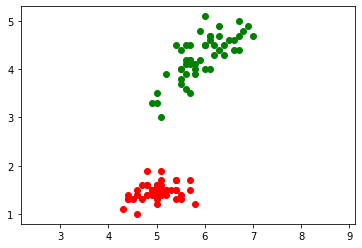

In [5]:
plt.plot(setosa[:,:1], setosa[:,1:] , 'ro', label='setora')
plt.plot(versi[:,:1], versi[:,1:] , 'go', label='versicolor')
plt.axis('equal')
plt.plot()
plt.show()

## **Shuffle data to get train_dataset and test_data_set** 

In [6]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.6, random_state=4, stratify=y )

## **Perceptron and predict function**

In [7]:
def accuracy(y_test, y_pred):
  return np.sum(y_test==y_pred)/len(y_test)

In [8]:
def perceptron(X,y,w,b,lr):
  acc=0
  count=0
  while acc<1:
    y_pred_arr=[]
    for i in range(X.shape[0]):
      y_pred=np.sign(np.dot(w,X[i]) +b )   
      dw=  -(y[i]-y_pred) * X[i]
      db=  -(y[i]-y_pred)
      w-= dw*lr 
      b-= db*lr 
      y_pred_arr.append(y_pred)
    count+=1
    acc=accuracy(y,y_pred_arr)
    print("accuracy train in process {} : {}".format(count, acc))
  return w,b 


In [9]:

def predict(X):
  w=np.zeros(X.shape[1])
  b=0
  y_pred=[]
  w,b = perceptron(X_train,y_train,w,b,0.1)
  for i in range(X.shape[0]):
    y_pred.append(np.sign(np.dot(w,X[i]) +b ))
  return y_pred

In [10]:
y_pred=predict(X_test)
print("y_test_prediction : ",y_pred)
print("y_test : ", y_test)

accuracy train in process 1 : 0.75
accuracy train in process 2 : 1.0
y_test_prediction :  [1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0]
y_test :  [1 1 1 -1 1 -1 -1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 -1 -1 -1 -1 -1 1 -1 -1 -1
 -1 -1 1 1 -1 -1 -1 -1 1 1 1 -1 -1 -1 1 -1 -1 -1 1 1 -1 1 -1 -1 -1 -1 1 1
 -1 1]


In [11]:

print("accuracy test: ",accuracy(y_test, y_pred))

accuracy test:  1.0


## **Model** 

In [ ]:
class Perceptron:
  def __init__(self, lr):
    self.lr = lr 
    self.w = None
    self.b = None
  def fit(self,X,y):
    self.w = np.zeros(X.shape[1])
    self.b =0
    acc=0
    while acc!=1:
      y_pred_arr=[]
      for i in range(X.shape[0]):
        y_pred=np.sign(np.dot(self.w,X[i]) +self.b )   
        dw=  -(y[i]-y_pred) * X[i]
        db=  -(y[i]-y_pred)
        self.w-= dw*self.lr 
        self.b-= db*self.lr 
        y_pred_arr.append(y_pred)
      acc=accuracy(y,y_pred_arr)

  def predict(self,X):
    y_pred=[]
    for i in range(X.shape[0]):
      y_pred.append(np.sign(np.dot(self.w,X[i]) +self.b ))
    return y_pred

  def accuracy(y_test, y_pred):
    return np.sum(y_test==y_pred)/len(y_test)

per=Perceptron(0.1)
per.fit(X_train, y_train)
y_pred= per.predict(X_test)
print("accuracy test : ", accuracy(y_test, y_pred))

accuracy test :  1.0
